## Imbalanced Classes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- Stratified sampling

In [2]:
from sklearn.model_selection import StratifiedKFold

X = np.ones(10)
y = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(X, y):
     print("%s %s" % (train, test))


[2 3 6 7 8 9] [0 1 4 5]
[0 1 3 4 5 8 9] [2 6 7]
[0 1 2 4 5 6 7] [3 8 9]


- Oversample minority class 

- Undersample majority class 

In [3]:
# conda install -c conda-forge -n eods-f19 imbalanced-learn

In [4]:
from sklearn.datasets import make_classification
from collections import Counter
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)
Counter(y).items()

dict_items([(2, 4674), (1, 262), (0, 64)])

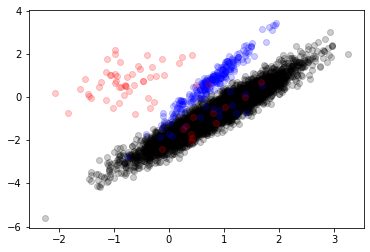

In [5]:
plt.scatter(X[y==2,0],X[y==2,1],c='k', alpha=.2);
plt.scatter(X[y==1,0],X[y==1,1],c='b', alpha=.2);
plt.scatter(X[y==0,0],X[y==0,1],c='r', alpha=.2);

In [6]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_r, y_r = ros.fit_sample(X, y)
from collections import Counter
Counter(y_r).items()

dict_items([(2, 4674), (1, 4674), (0, 4674)])

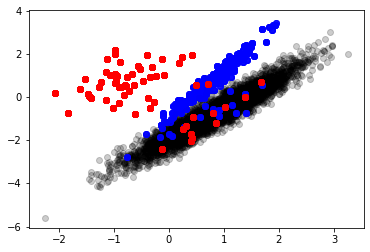

In [7]:
plt.scatter(X_r[y_r==2,0],X_r[y_r==2,1],c='k', alpha=.2);
plt.scatter(X_r[y_r==1,0],X_r[y_r==1,1],c='b', alpha=.2);
plt.scatter(X_r[y_r==0,0],X_r[y_r==0,1],c='r', alpha=.2);

In [8]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_r, y_r, = rus.fit_sample(X, y)
from collections import Counter
Counter(y_r).items()

dict_items([(0, 64), (1, 64), (2, 64)])

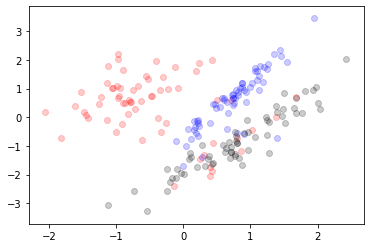

In [9]:

plt.scatter(X_r[y_r==0,0],X_r[y_r==0,1],c='r', alpha=.2);
plt.scatter(X_r[y_r==1,0],X_r[y_r==1,1],c='b', alpha=.2);
plt.scatter(X_r[y_r==2,0],X_r[y_r==2,1],c='k', alpha=.2);

Create new minority class items

In [10]:
# Synthetic Minority Oversampling
from imblearn.over_sampling import SMOTE

X_r, y_r = SMOTE().fit_sample(X, y)
Counter(y_r).items()

dict_items([(2, 4674), (1, 4674), (0, 4674)])

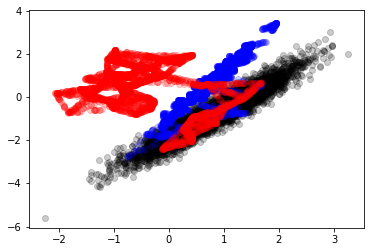

In [11]:
plt.scatter(X_r[y_r==2,0],X_r[y_r==2,1],c='k', alpha=.2);
plt.scatter(X_r[y_r==1,0],X_r[y_r==1,1],c='b', alpha=.2);
plt.scatter(X_r[y_r==0,0],X_r[y_r==0,1],c='r', alpha=.2);

In [12]:
# Adaptive Synthetic Minority Oversampling
from imblearn.over_sampling import ADASYN

X_r, y_r = ADASYN().fit_sample(X, y)
Counter(y_r).items()

dict_items([(2, 4674), (1, 4662), (0, 4673)])

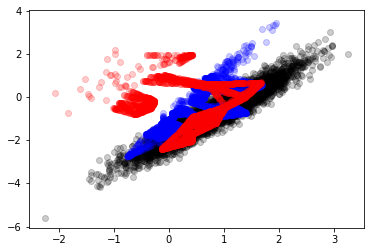

In [13]:
plt.scatter(X_r[y_r==2,0],X_r[y_r==2,1],c='k', alpha=.2);
plt.scatter(X_r[y_r==1,0],X_r[y_r==1,1],c='b', alpha=.2);
plt.scatter(X_r[y_r==0,0],X_r[y_r==0,1],c='r', alpha=.2);

- Adjust class weight (sklearn)

- Adjust decision threshold (sklearn)

- Treat as anomaly detection

- Buy more data